<a href="https://colab.research.google.com/github/ICodedeveloper/Deteccao-de-objetos/blob/main/Yolo_v4_Detec%C3%A7%C3%A3o_de_objetos_com_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yolo v4 - Detecção de objetos com opencv

##Etapa 1 - Importando as blibliotecas

In [2]:
import cv2
print(cv2.__version__)


4.1.2


In [3]:
!pip install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4MB 83kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.4.0


##Etapa 2 - Conectando com o Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Etapa 3 -Carregando os arquivos do modelo treinado

In [3]:
path = '/content/gdrive/My Drive/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
labels_path = os.path.sep.join(['/content/cfg','coco.names'])
labels_path

'/content/cfg/coco.names'

In [5]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(LABELS)

80

In [7]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [8]:
net = cv2.dnn.readNet(config_path, weights_path)
net

<dnn_Net 0x7fbbac7e4fb0>

##Etapa 4 - Definindo mais configurações para a detecção

In [9]:
COLORS = np.random.randint(0,255, size=(len(LABELS),3), dtype='uint8')
print(COLORS)

[[ 30 236 212]
 [113 211 117]
 [190  73  63]
 [ 74  18 182]
 [219  98 197]
 [112  19  57]
 [ 35  61 194]
 [159 189 133]
 [104  38   2]
 [ 10 176 144]
 [  1 206 245]
 [ 96  85 156]
 [ 87 238  27]
 [228 172 207]
 [199  16  55]
 [163 177 103]
 [105   4  67]
 [ 13  65  92]
 [122  44 240]
 [122 197 241]
 [ 64 176 133]
 [227  56 214]
 [ 94 139  70]
 [229 109 122]
 [139  60 182]
 [ 83 117 206]
 [120  69 176]
 [ 46 151 127]
 [199 224 164]
 [247 161 183]
 [ 81 209 158]
 [116  92  95]
 [129 141   7]
 [ 27  97  31]
 [144  65  56]
 [216 147  21]
 [164  70 106]
 [208 154   2]
 [231 251  24]
 [149  63 216]
 [157 188 102]
 [189  22  57]
 [ 40 152  54]
 [110  98 204]
 [ 90   9 113]
 [222  94 249]
 [197  26 164]
 [200 223  66]
 [ 16  60  19]
 [ 32 152  16]
 [117 218  58]
 [ 13  40  44]
 [ 59 225  78]
 [ 54 106  41]
 [202 237  28]
 [ 96 239  48]
 [ 14 232  24]
 [217 109 220]
 [103 100 207]
 [ 40 224  58]
 [ 27 137  20]
 [ 13 215 219]
 [112 214 221]
 [ 42 182 142]
 [212 147 167]
 [ 74 168  46]
 [ 36 113 

In [10]:
ln = net.getLayerNames()
print('Todas as camadas ')
print(ln)
print('Total de camadas ' + str(len(ln)))

Todas as camadas 
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_3

In [11]:
print('camadas de saida')
print(net.getUnconnectedOutLayers())

camadas de saida
[[327]
 [353]
 [379]]


In [12]:
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

##Etapa 5 - Carregamento a  imagem onde será feita a detecção

In [13]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

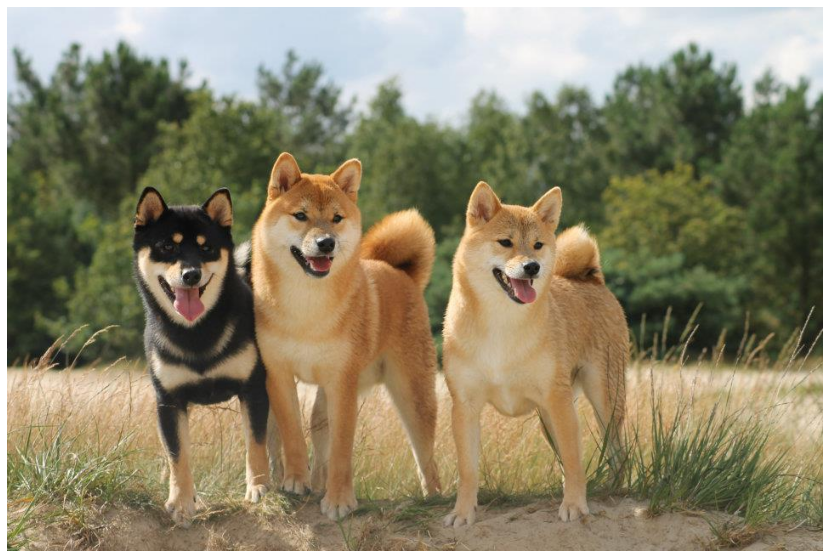

In [39]:
imagem = cv2.imread('/content/gdrive/My Drive/YOLO/imagens/cachorros.jpg')
mostrar(imagem)

In [15]:
imagem_cp = imagem.copy()

In [38]:
imagem.shape

(1000, 1500, 3)

In [17]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


##Etapa 6 - Processamento a imagem de entrada

In [18]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB=True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundo'.format(termino - inicio))

YOLO levou 2.12 segundo


##Etapa 7 - Definindo as variavéis

In [19]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

##Etapa - Realizando a predição

In [20]:
layer_outputs[0] 

array([[0.0110055 , 0.01021747, 0.02264759, ..., 0.        , 0.        ,
        0.        ],
       [0.01492388, 0.01543289, 0.03303423, ..., 0.        , 0.        ,
        0.        ],
       [0.01701082, 0.01489798, 0.05110354, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
        0.        ],
       [0.98667467, 0.98426443, 0.03099855, ..., 0.        , 0.        ,
        0.        ],
       [0.9830682 , 0.985908  , 0.05975068, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [21]:
layer_outputs[1] 

array([[0.03031933, 0.03208476, 0.10433296, ..., 0.        , 0.        ,
        0.        ],
       [0.03298577, 0.03253514, 0.13059245, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151366, 0.15157257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866273, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513652, ..., 0.        , 0.        ,
        0.        ],
       [0.96610314, 0.9677124 , 0.10772247, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [22]:
layer_outputs[2],  len(layer_outputs[2] [0])

(array([[0.0640237 , 0.06951442, 0.15857814, ..., 0.        , 0.        ,
         0.        ],
        [0.06164717, 0.05672135, 0.31426722, ..., 0.        , 0.        ,
         0.        ],
        [0.03240779, 0.05009161, 0.7458891 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772264, ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.52080923, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 85)

In [23]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.605953 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
classe mais provável: 16
confiança: 0.605953
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570455 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.   

In [24]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [25]:
print(confiancas), len(confiancas)

[0.6059529781341553, 0.9570454955101013, 0.88912433385849, 0.9090498089790344, 0.9525655508041382, 0.7894678115844727, 0.9860403537750244, 0.9869317412376404, 0.6623730659484863, 0.6959574222564697, 0.9729036688804626, 0.9767158627510071, 0.8875227570533752, 0.897688627243042, 0.9810121655464172, 0.9824252128601074]


(None, 16)

In [26]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

In [27]:
print(LABELS[16])

dog


##Etapa 9 - Aplicacao a Non-Maxima Suppression

In [28]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [29]:
objs

array([[ 7],
       [15],
       [11]], dtype=int32)

In [30]:
print(objs.flatten())

[ 7 15 11]


In [31]:
confiancas[7], confiancas[15], confiancas[11]


(0.9869317412376404, 0.9824252128601074, 0.9767158627510071)

In [32]:
confiancas[0]

0.6059529781341553

##Etapa 10 - Mostrando o resultado da detecção na imagem

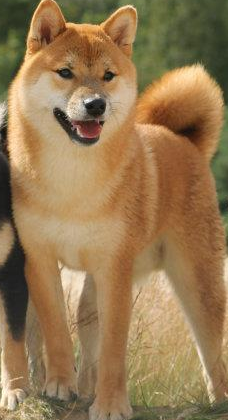

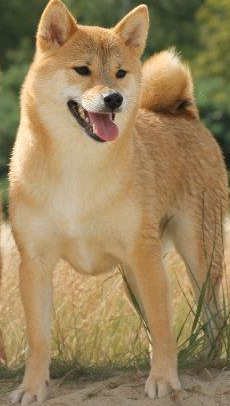

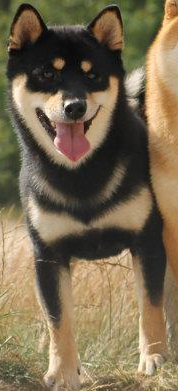

In [33]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

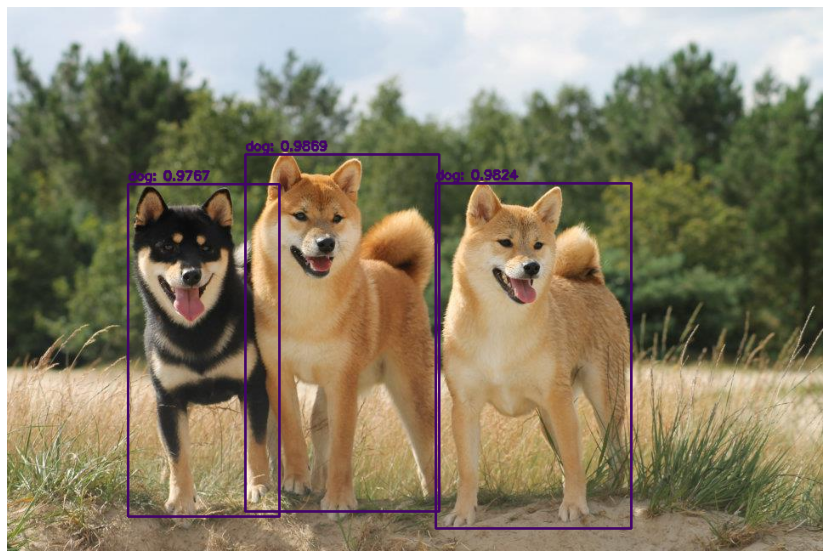

In [34]:
mostrar(imagem)

In [35]:
cv2.imwrite('resultado.jpg', imagem)


True